## A trial attempt to figure out the appropriate no. of neighbors to be chosen in KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as skm




#### Features of the dataset used:
* Dataset contains both STAs and APs
* Interference is the average of the list given for a particular AP and 0 for STAs
* Same goes for airtime
* The dataset is divided into training and test sets

In [2]:
df =pd.read_csv("C:/Users/shrey/OneDrive/Documents/.PES/PIL/fin-dataset_2.csv")
#df=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Documents\\.PES\PIL\\full_dataset_with_int_map.csv")
#df.columns
#df.head()
#df.info()
y=df['throughput'].values #throughput 

x=df[[ 'node_type', 'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime', 'average_interference',
       'wlan_code_index','average_interference']].values
#x=df[['0','1','2','3','4', '5', '6', '7', '8', '9', '10',
#       '11', 'wlan_code_index', 'x(m)', 'y(m)', 'primary_channel',
#       'min_channel_allowed', 'max_channel_allowed', 'RSSI', 'SINR',
#       'average_airtime']].values  
#x=df.select_dtypes(exclude='throughput')
#x.values
df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
df


,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0
1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0
2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0
3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0
4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9
87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9
87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9
87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9


#### Elbow method used to find the optimal number of neighbors to fit the KNN model

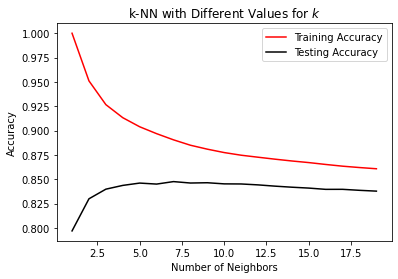

In [4]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()
neighbors = np.arange(1, 20) 
y=df['throughput'].values #throughput 

x=df[[  'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime',
       'wlan_code_index','average_interference']].values
#x=df[['0','1','2','3','4', '5', '6', '7', '8', '9', '10',
#       '11', 'wlan_code_index', 'x(m)', 'y(m)', 'primary_channel',
#       'min_channel_allowed', 'max_channel_allowed', 'RSSI', 'SINR',
#       'average_airtime']].values  
#x=df.select_dtypes(exclude='throughput')
#x.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=101)

plot_complexity_curve(neighbors, KNeighborsRegressor, x_train, x_test, y_train, y_test)

plt.show()

### Assuming the above graph to be somewhat accurate, taking the number of neighbors as observed

In [5]:
for i in np.arange(2,14): 
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    
    
    print(f"Neighbor(s):{i},pred:{pred},  actual:{y_test}")
    #print(y_test)
    #metrics
    print("MSE:",end=' '); print(skm.mean_squared_error(y_test, pred))
    print("MAE:",end=' '); print(skm.mean_absolute_error(y_test, pred))
    print("R2:",end=' ');print(skm.r2_score(y_test, pred))
    print("knn score:",end=' '); print(knn.score(x_test, y_test))
    print("*****************************************************************************************")
print()
print()
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
#print metrics
print(f"Neighbor(s):{5},pred:{pred},  actual:{y_test}")
print("MSE:",end=' ');print(skm.mean_squared_error(y_test, pred))
print("MAE:",end=' ');print(skm.mean_absolute_error(y_test, pred))
print("R2:",end=' ');print(skm.r2_score(y_test, pred))

Neighbor(s):2,pred:[ 2.995  3.455  0.04  ... 14.9    8.145  3.975],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 142.49765596206348
MAE: 5.014005517006028
R2: 0.8299050810641407
knn score: 0.8299050810641407
*****************************************************************************************
Neighbor(s):3,pred:[ 3.27666667  2.58333333  0.02666667 ... 15.84666667  7.68333333
  4.69      ],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 134.2107984820334
MAE: 4.935970879308384
R2: 0.8397968392252293
knn score: 0.8397968392252293
*****************************************************************************************
Neighbor(s):4,pred:[ 3.3975  2.005   0.0775 ... 15.245   7.165   5.245 ],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 130.9689060299596
MAE: 4.924568735069958
R2: 0.8436665831175855
knn score: 0.8436665831175855
*****************************************************************************************
Neighbor(s):5,pred:[ 3.716  2.412  0.092 